<a href="https://colab.research.google.com/github/flaviovdf/fcd/blob/main/labs/lab02/sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório 2: Visualizações de Dados e Funções Python

Bem-vindo ao Laboratório 2! Esta semana você praticará alguns métodos DataFrame (especialmente `groupby`), criará visualizações de dados e aprenderá como escrever suas próprias funções em Python. Criar funções pode ser uma novidade para você, mas não se preocupe, esta tarefa irá guiá-lo nesse processo! Você deve concluir todo este laboratório e enviá-lo ao **Moodle** até às **23h59** da data de vencimento.

Os tópicos deste laboratório são abordados em [BPD 6](https://notes.dsc10.com/01-getting_started/functions-defining.html), [11](https://notes.dsc10.com/02-data_sets/groupby.html), [12](https://notes.dsc10.com/02-data_sets/apply.html) nas notas de `babypandas` e no [Chapter 7](https://inferentialthinking.com/chapters/07/Visualization.html) do livro texto.


**Não use loops for em nenhuma pergunta deste laboratório.** Se você não sabe o que é um loop for, não se preocupe: ainda não abordamos isso. Mas se você sabe o que eles são e está se perguntando por que não é correto usá-los, é porque os loops em Python são lentos e os loops em arrays e DataFrames geralmente devem ser evitados.

Primeiro, configure os testes e importações executando a célula abaixo.

In [169]:
# Descomente para executar no Colab
! pip install babypandas --quiet

In [170]:
import numpy as np
import babypandas as bpd

# Aqui configuramos a biblioteca de visualização de dados.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Aplicativos da Google Play Store 📲

Neste problema, praticaremos manipulações de DataFrame e visualizações de dados, enquanto exploramos o [Google Play Store Apps Dataset](https://www.kaggle.com/lava18/google-play-store-apps), extraído da Google Play Store.

In [171]:
# Run this cell to load in the dataset
apps = bpd.read_csv('https://raw.githubusercontent.com/dsc-courses/dsc10-2023-wi/main/labs/lab02/data/googleplaystore.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10820,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0,Everyone,Education
10821,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0,Everyone,Education
10822,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0,Everyone,Medical
10823,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference


Cada linha no DataFrame corresponde a um aplicativo. Aqui estão as descrições de algumas das colunas.
- `'Category'`: Categoria à qual o aplicativo pertence.
- `'Rating'`: Avaliação geral do usuário do aplicativo em 5 (no momento da recuperação de dados).
- `'Reviews'`: Número de avaliações de usuários sobre o aplicativo (no momento da recuperação dos dados).
- `'Installs'`: ​​Número de downloads/instalações do usuário para o aplicativo (no momento da recuperação dos dados).
- `'Content Rating'`: Público-alvo do aplicativo, como "Todos" ou "Adolescentes".

⚠️ Observe que `'Rating'` e `'Content Rating'` significam coisas diferentes. Não os confunda!

Observe que não definimos o índice do DataFrame, embora pareça que o nome do aplicativo seria um bom candidato. Mas os nomes dos aplicativos não são exclusivos! Podemos verificar isso com a ajuda do método Series `.unique()`. Quando chamado em uma Série, este método retorna um array de todos os valores distintos da Série, sem duplicatas.

Vemos acima que o DataFrame possui 10.825 linhas. Isso significa que existem 10.825 aplicativos no conjunto de dados. Mas vamos calcular quantos nomes de aplicativos exclusivos existem:

In [172]:
len(apps.get('App').unique())

9644

Como $9644 <10825$, deve haver duplicatas!

Como existem duplicatas, o nome do aplicativo não é um bom rótulo de linha. Na verdade, não existe um bom rótulo de linha neste caso. Em situações como essa, deixaremos o índice como está.

**Pergunta 1.1.** Você pode pensar que, em uma escala de 1 a 5, um aplicativo intermediário típico deveria ter uma classificação de cerca de 3.
Faça um histograma da coluna `'Rating'` para ver se é esse o caso.

<Axes: ylabel='Frequency'>

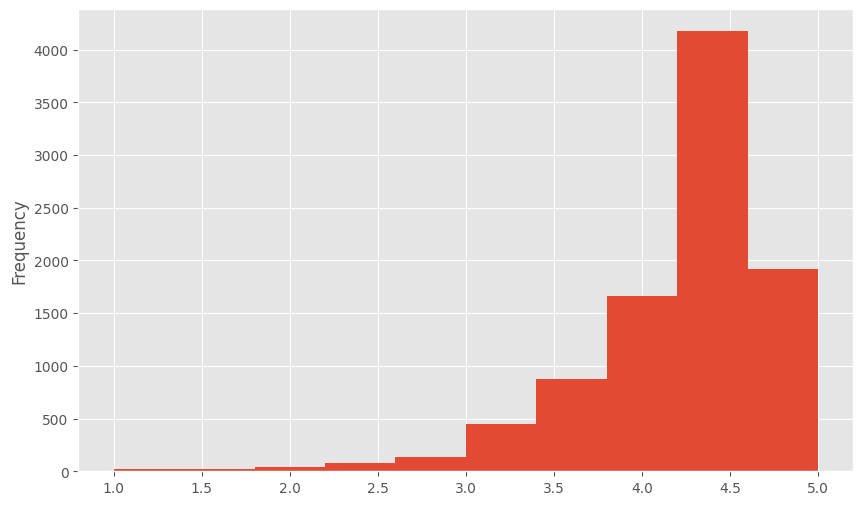

In [173]:
apps.get('Rating').plot(kind="hist")

Certamente parece haver muitos aplicativos excelentes por aí! Seria interessante ver se os aplicativos com classificações mais altas também têm mais avaliações.

**Pergunta 1.2.** Que tipo de gráfico você gostaria de criar para ajudar a determinar se os aplicativos com classificação mais alta também têm mais avaliações? Atribua 1, 2, 3 ou 4 ao nome `plot_type` abaixo.

1. gráfico de dispersão
2. gráfico de linha
3. gráfico de barras
4. histograma

In [174]:
plot_type = 2

**Pergunta 1.3.** Agora crie o gráfico identificado acima para ajudá-lo a determinar se os aplicativos com classificação mais alta também têm mais avaliações.

<!--
COMEÇAR PERGUNTA
nome: q1_3
-->

<Axes: xlabel='Rating'>

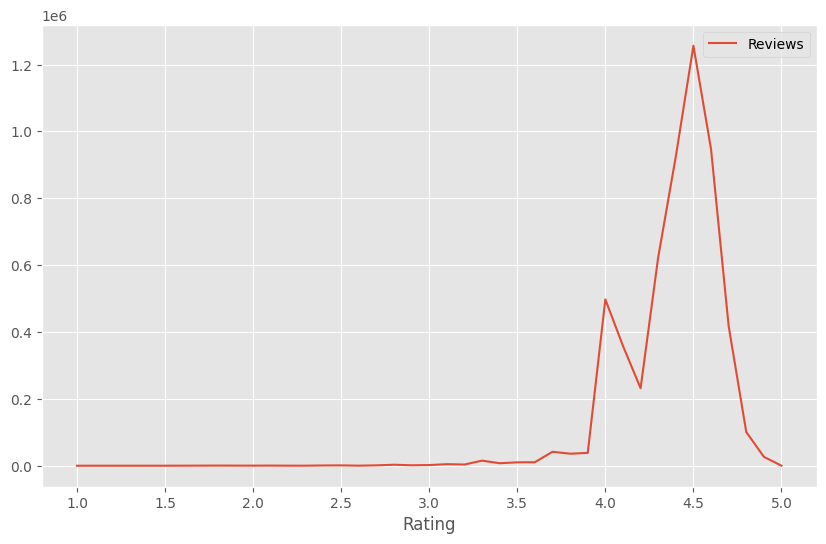

In [175]:
# Crie seu plot aqui.
appsSorted = apps.groupby('Rating')
appsSorted.mean().plot(kind="line", y="Reviews")

**Pergunta 1.4.** Qual das seguintes afirmações podemos concluir, com base nestes dados? Atribua 1, 2, 3 ou 4 ao nome `plot_conclusion` abaixo.

1. Os aplicativos com classificações mais altas tornam-se mais populares e, como mais pessoas estão usando esses aplicativos, mais avaliações são fornecidas.
2. Os aplicativos com mais avaliações tornam-se mais populares e, como mais pessoas estão usando esses aplicativos, são atribuídas classificações mais altas.
3. 1 e 2.
4. Nem 1 nem 2.

In [176]:
plot_conclusion = 4

**Pergunta 1.5.** Atribua o nome `by_content` a um DataFrame que conte o número de aplicativos por `'Content Rating'`, indexados por `'Content Rating'`.

*Dica*: Para manter apenas certas colunas em um DataFrame, chame `.get` com uma lista de nomes de colunas que você deseja manter.

In [177]:
by_content = apps.groupby('Content Rating').count().get('App')
by_content

Content Rating
Adults only 18+       3
Everyone           8702
Everyone 10+        413
Mature 17+          499
Teen               1206
Unrated               2
Name: App, dtype: int64

**Pergunta 1.6.** Crie um DataFrame chamado `install_stats` que possui uma única coluna, `'Installs'`, que contém o número médio de `'Installs'` para cada tipo de classificação de conteúdo. Não há problema se as respostas forem exibidas em notação científica.

In [178]:
install_stats = apps.groupby('Content Rating').mean().get('Installs')
install_stats

Content Rating
Adults only 18+    6.666667e+05
Everyone           1.311844e+07
Everyone 10+       3.204330e+07
Mature 17+         1.107112e+07
Teen               2.878636e+07
Unrated            2.525000e+04
Name: Installs, dtype: float64

**Pergunta 1.7.** Crie um DataFrame chamado `top_communication_apps_by_content_rating` que contenha, para cada `'Content Rating'` único, o número de aplicativos que atendem a ambas as condições:

- `'Category'` é `'COMMUNICATION'`.
- `'Rating'` está entre 4 e 5 (inclusive).

A estrutura de `top_communication_apps_by_content_rating` deve ser a seguinte:

- Deve ter apenas uma coluna, `'Top_Comm_Apps'`.
- Deve ser ordenado por `'Top_Comm_Apps'` em ordem decrescente.

*Dica:* Você pode fazer isso como quiser, mas uma maneira de proceder é:

1. Criar um único DataFrame que contenha apenas as linhas que correspondam às condições especificadas
2. Chamar a função `groupby` no DataFrame obtido anteriormente.
3. Ordenar o DataFrame da etapa 2, além de usar as funções `assign` e `drop` para renomear a coluna `'App'` para `'Top_Comm_Apps'`.

In [179]:
top_comm_apps = apps[
    apps.get('Category') == 'COMMUNICATION' and 
    apps.get('Rating') >= 4 
]
top_comm_apps = top_comm_apps.groupby('Content Rating').count()
top_comm_apps = top_comm_apps.sort_values('App')
top_communication_apps_by_content_rating = top_comm_apps.get('App')
top_communication_apps_by_content_rating

Content Rating
Unrated               1
Adults only 18+       2
Everyone 10+        341
Mature 17+          349
Teen                880
Everyone           5795
Name: App, dtype: int64

**Pergunta 1.8.** Suponha que um bom aplicativo seja aquele com pelo menos um milhão de instalações e uma classificação de pelo menos 4,0. Crie uma variável chamada `best_category` contendo o nome da categoria com o maior número de aplicativos bons.

_Nota:_ Sua resposta deve ser gerada usando código – não codificando uma string! (Em outras palavras, não escreva `best_category = "DATING"` se você acha que essa é a melhor categoria).

In [180]:
best_category = apps[
    apps.get('Installs') >= 1_000_000 and 
    apps.get('Rating') >= 4 
].groupby('Category').count().sort_values('App', ascending=False).index[0]

best_category

'FAMILY'

**Pergunta 1.9.** Faça um gráfico de barras da classificação média por categoria em que as barras são classificadas da menor para a maior. Seu resultado deve ficar assim:

<img src="https://raw.githubusercontent.com/dsc-courses/dsc10-2023-wi/main/labs/lab02/data/barchart.jpg" width=60%/>


<Axes: xlabel='Category'>

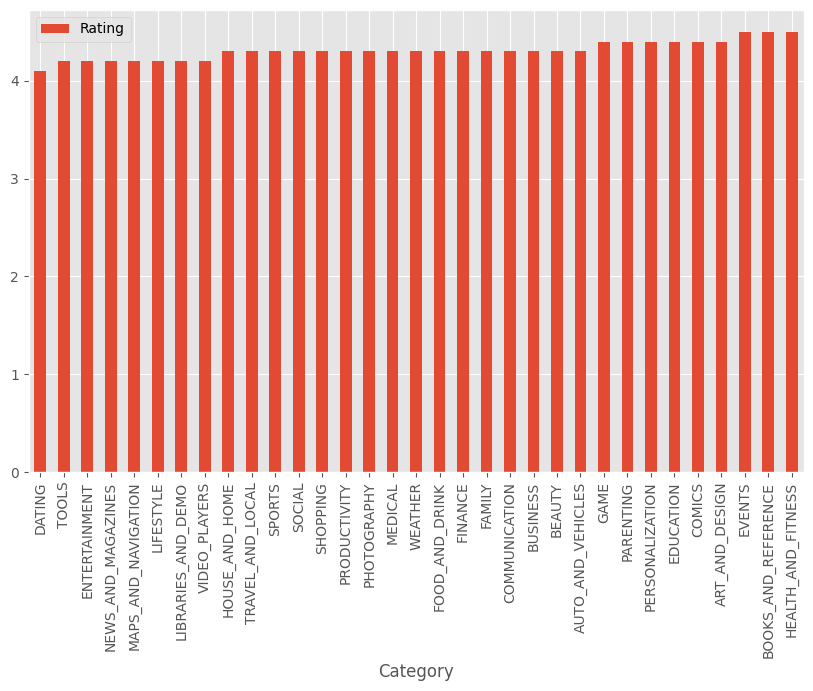

In [181]:
apps.groupby('Category').median().sort_values('Rating').plot(kind='bar', y='Rating')

## 2. Renda dos CEOs 💼

No restante deste laboratório, veremos a remuneração de 2015 dos Diretores Executivos (CEOs) das 100 maiores empresas da Califórnia. Os dados foram compilados para uma análise do [Los Angeles Times ](http://spreadsheets.latimes.com/california-ceo-compensation/) e, em última análise, vieram [daqui](http://spreadsheets.latimes.com/california-ceo-compensation/), exigido pela Comissão de Valores Mobiliários dos EUA, de todas as empresas de capital aberto. Duas das empresas em nosso conjunto de dados têm dois CEOs, portanto há 102 CEOs no conjunto de dados.

Copiamos os dados da página do LA Times para um arquivo chamado `raw_compensation.csv`. A página observa que todos os valores em dólares estão em milhões de dólares.

In [182]:
raw_compensation = bpd.read_csv('https://raw.githubusercontent.com/dsc-courses/dsc10-2023-wi/main/labs/lab02/data/raw_compensation.csv').set_index('Rank')
raw_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
Rank,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000
...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000


Queremos calcular a média dos salários dos CEOs. Tente executar a célula abaixo. 🚨 Quando terminar, não se esqueça de comentar.

In [183]:
# Após rodar essa célula e observar o erro, comente-a para que o erro não se repita ao executar o notebook todo!

#raw_compensation.get("Total Pay").mean()

Você deverá ver um erro. Vamos examinar por que esse erro ocorreu observando os valores na coluna `'Total Pay'`.

**Pergunta 2.1.** Use a função `type` para definir `total_pay_type` como o tipo do primeiro item da coluna `'Total Pay'`.

In [184]:
total_pay_type = type(raw_compensation.get("Total Pay").iloc[0])
total_pay_type

str

**Pergunta 2.2.** Você deve ter descoberto que os valores na coluna `'Total Pay'` são strings (texto). Não faz sentido calcular a média dos valores do texto, então precisamos convertê-los em números se quisermos fazer isso. Extraia o primeiro valor na coluna `'Total Pay'`. É o salário de 2015 de Mark Hurd, um dos dois CEOs da Oracle em 2015, em *milhões* de dólares. Chame-o de `mark_hurd_pay_string`.

In [185]:
mark_hurd_pay_string = raw_compensation.get("Total Pay").iloc[0]
mark_hurd_pay_string

'$53.25 '

**Pergunta 2.3.** Usando código, converta `mark_hurd_pay_string` em um número de *dólares* e armazene o resultado na variável `mark_hurd_pay`, que deve ser um float.
- O método string `strip` será útil para remover o cifrão; remove um caractere especificado do início ou final de uma string. Por exemplo, o valor de `"100%".strip("%")` é a string `"100"`.
- Você também precisará da função `float`, que converte uma string que se parece com um número em um número real.
- Por último, lembre-se que a resposta deve ser em dólares, e não em milhões de dólares.

In [186]:
mark_hurd_pay = float(mark_hurd_pay_string.strip('$')) * 1_000_000
mark_hurd_pay

53250000.0

Para calcular o salário médio, precisamos fazer isso para cada CEO. Mas parece que isso envolveria copiar esse código 102 vezes... Não, obrigado! 🙅

É aqui que entram as funções. Suponha que em vez de `mark_hurd_pay_string`, tivéssemos uma variável chamada `some_pay_string`, formatada da mesma forma que `mark_hurd_pay_string`, com um cifrão seguido por um valor. Agora que fizemos isso para `mark_hurd_pay_string`, poderíamos usar essencialmente o mesmo código em `some_pay_string` para extrair o pagamento como um número de dólares. Você só precisa alterar `mark_hurd_pay_string` em seu código para `some_pay_string`.

**Pergunta 2.4.** Dentro da função abaixo, digite a palavra `return` (que deve ficar verde), depois copie a expressão que você usou para calcular `mark_hurd_pay`, mas substitua o `mark_hurd_pay_string` específico pelo genérico `some_pay_string` .

In [187]:
def convert_pay_string_to_number(some_pay_string):
    """Converte uma string como '$100' (em milhões) para um número em dólares."""
    return float(some_pay_string.strip('$')) * 1_000_000

Aqui, definimos uma nova função, dando um nome à expressão que converte strings `'Total Pay'` em valores numéricos. Esta função pode converter qualquer string com o formato correto (como "$100") em um número que representa milhões de dólares. Posteriormente neste laboratório, veremos o resultado: podemos chamar (usar) essa função em cada string de pagamento no conjunto de dados de uma só vez.

Podemos chamar nossa função da mesma forma que chamamos as funções "built-in" que vimos. Ela leva um argumento, uma string, e retorna um número.

In [188]:
convert_pay_string_to_number('$42')

42000000.0

In [189]:
convert_pay_string_to_number(mark_hurd_pay_string)

53250000.0

In [190]:
# Também podemos computar o pagamento de Safra Catzs da mesma forma:
convert_pay_string_to_number(raw_compensation.get('Total Pay').iloc[1])

53240000.0

O que ganhamos? Bem, sem a função, teríamos que copiar aquele material `float(some_pay_string.strip("$")) * 1000000` **cada vez** que quiséssemos converter uma string de pagamento. Agora chamamos apenas uma função cujo nome diz exatamente o que está fazendo.

Em breve, veremos como aplicar esta função a cada string de pagamento com uma única expressão. Primeiro, vamos aprender mais algumas funções.

## 3. Definindo Funções ➗

Vamos escrever uma função muito simples que converte uma proporção em uma porcentagem multiplicando-a por 100. Por exemplo, o valor de `to_percentage(0.5)` deve ser o número 50. (Sem sinal de porcentagem).

Uma definição de função possui algumas partes.

#### `def`
Sempre começa com `def` (abreviação de **def**ine):

    def

#### Nome
Em seguida vem o nome da função. Vamos chamar nossa função de `to_percentage`.

    def to_percentage

#### Assinatura

Em seguida vem algo chamado *assinatura* da função. Isso informa ao Python quantos *argumentos* sua função deve ter e quais nomes você usará para se referir a esses argumentos no código da função. `to_percentage` deve receber um argumento, e chamaremos esse argumento de `proporção`, pois deve ser uma proporção.

    def to_percentage(proportion)

Colocamos dois pontos após a assinatura para informar ao Python que acabou.

    def to_percentage(proportion):

##### Documentação
Funções podem fazer coisas complicadas, então **você deve escrever uma explicação do que sua função faz**. Para funções pequenas, isso é menos importante, mas é um bom hábito aprender desde o início. Convencionalmente, as funções Python são documentadas escrevendo uma string entre aspas triplas:

    def to_percentage(proportion):
    """Converte uma proporção em porcentagem."""


##### Corpo
Agora começamos a escrever o código que é executado quando a função é chamada. Isso é chamado de *corpo* da função. Podemos escrever qualquer coisa que escreveríamos em qualquer outro lugar. Primeiro, vamos dar um nome ao número pelo qual multiplicamos uma proporção para obter uma porcentagem.

    def to_percentage(proportion):
    """Converte uma proporção em porcentagem."""
    fator = 100

##### `return`
A instrução especial `return` no corpo de uma função diz ao Python para tornar o valor da chamada de função igual ao que vem logo após `return`. A instrução return também *termina a função* e uma vez chamada *nenhuma linha no corpo após será executada*. Então, queremos que o valor de `to_percentage(0.5)` seja a proporção 0.5 vezes o fator 100, então escrevemos:

    def to_percentage(proportion):
    """Converte uma proporção em porcentagem."""
    fator = 100
    return proportion * fator

**Questão 3.1.** Defina a função `to_percentage` na célula abaixo. Chame sua função para converter a proporção `0.2` em uma porcentagem. Nomeie essa porcentagem como `vinte_percent`.

In [191]:
def to_percentage(proportion):
    """ Converte uma proporção para porcentagem """
    factor = 100
    return proportion * factor

In [192]:
twenty_percent = to_percentage(0.2)
twenty_percent

20.0

Assim como as funções integradas, você pode passar nomes de variáveis ​​como argumentos para sua função.

**Pergunta 3.2.** Use `to_percentage` novamente para converter a proporção chamada `a_proportion` (definida abaixo) em uma porcentagem chamada `a_percentage`.

*Nota:* Você não precisa definir `to_percentage` novamente! Assim como outras coisas nomeadas, as funções permanecem depois que você as define.

In [193]:
a_proportion = 2**(0.5) / 2

In [194]:
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

Aqui está um fato importante sobre funções: os nomes de variáveis ​​atribuídos dentro do corpo de uma função só são acessíveis dentro do corpo dessa função. Assim que a função retornar, esses nomes desaparecerão. Portanto, mesmo que você tenha definido `factor = 100` dentro de `to_percentage` acima e depois chamado `to_percentage`, o nome da variável `factor` não tem significado fora do corpo de `to_percentage`.

Para mostrar o que queremos dizer, execute a célula a seguir. **Isso causa um erro intencionalmente**. 🚨 Quando terminar, comente-a.

In [195]:
# Você deve ver um erro ao rodar isso.
#(Caso não veja, você deve ter definido a variável 'factor' em algum lugar acima)

#factor

Se quiséssemos, poderíamos definir uma nova variável com o nome `factor` fora da definição de `to_percentage`, e ela poderia ter qualquer valor que quiséssemos.

Como vimos com as funções integradas, as funções também podem receber strings (ou arrays, ou DataFrames) como argumentos e também podem retornar essas coisas.

**Questão 3.3.** Defina uma função chamada `disemvowel`. Deve receber uma única string como argumento. (Você pode chamar esse argumento como quiser.) Ele deve retornar uma cópia dessa string, mas com todos os caracteres que são vogais removidos. Você pode assumir que `disemvowel` só será chamado em strings minúsculas, o que significa que você só precisa se livrar das vogais minúsculas
. (Em inglês, as vogais são os caracteres "a", "e", "i", "o" e "u".)

*Dica:* Para remover todos os "a"s de uma string, você pode usar `that_string.replace("a", "")`. E você pode chamar `replace` várias vezes.

In [196]:
def disemvowel(a_string):
    for char in "aeiou":
        a_string = a_string.replace(char, "")
    return a_string

# Um exemplo de chamada da sua função. (Muitas vezes é útil rodar uma chamada de exemplo de tempos em tempos,
#conforme você vai escrevendo sua função, para saber como ela está se comportando.)

disemvowel("voce pode ler isso sem vogais?")

'vc pd lr ss sm vgs?'

##### Chamadas em chamadas em chamadas
Assim como você escreve uma série de linhas para construir um cálculo complexo, é útil definir uma série de pequenas funções que se complementam. Como você pode escrever qualquer código dentro do corpo de uma função, você pode chamar outras funções que escreveu.

Se uma função é como uma receita, definir uma função em termos de outras funções é como ter uma receita de bolo 🍰 dizendo para você seguir outra receita para fazer a cobertura e outra para fazer o recheio. Isso torna a receita do bolo mais curta e clara e evita um monte de receitas de glacê duplicadas. É a base da programação produtiva.

Por exemplo, suponha que você queira contar o número de caracteres *que não são vogais* em um trecho de texto. Uma maneira de fazer isso é remover todas as vogais e contar o tamanho da string restante.

**Questão 3.4.** Escreva uma função chamada `num_non_vowels`. Deve receber uma string como argumento e retornar um número. O número deve ser o número de caracteres na sequência do argumento que não são vogais. Novamente, você pode assumir que `num_non_vowels` só será chamado em strings minúsculas.

*Dica:* A função `len` pega uma string como argumento e retorna o número de caracteres nela.

In [197]:
def num_non_vowels(a_string):
    """Retorna o número de caracteres que não são vogais em uma string."""
    return disemvowel(a_string)

As funções também podem encapsular código que *faz coisas* em vez de apenas calcular valores. Por exemplo, se você chamar `print` dentro de uma função e depois, ao chamar essa função, algo será impresso.

O conjunto de dados `movies_by_year` nas notas do curso contém informações sobre as vendas de filmes nos últimos anos. Suponha que você queira exibir o ano com o quinto maior total de vendas brutas de filmes, impresso de forma legível. Você pode fazer isso:

In [198]:
movies_by_year = bpd.read_csv("https://raw.githubusercontent.com/dsc-courses/dsc10-2023-wi/main/labs/lab02/data/movies_by_year.csv").set_index('Year')
rank = 5
fifth_from_top_movie_year = movies_by_year.sort_values(by='Total Gross', ascending=False).index[rank-1]

print("Ano de número", rank, "com o maior número de vendas brutas foi", fifth_from_top_movie_year)

Ano de número 5 com o maior número de vendas brutas foi 2010


Depois de escrever isso, você percebe que também queria imprimir o 2º e o 3º anos mais altos. Em vez de copiar seu código, você decide colocá-lo em uma função. Como a classificação varia, você faz disso um argumento para sua função.

**Pergunta 3.5.** Escreva uma função chamada `print_kth_top_movie_year`. Deve levar um único argumento, a classificação do ano (como 2, 3 ou 5 nos exemplos acima). Deve imprimir uma mensagem como a acima. Não deveria ter uma instrução `return`, porque queremos que a função seja impressa, não retorne.

In [199]:
def print_kth_top_movie_year(k):
    year = movies_by_year.sort_values(by='Total Gross', ascending=False).index[k-1]
    print("Ano de número", k, "com o maior número de vendas brutas foi", year)

In [200]:
# Exemplos de chamadas para sua função
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)

Ano de número 2 com o maior número de vendas brutas foi 2013
Ano de número 3 com o maior número de vendas brutas foi 2012


## 4. Aplicando Funções 🩹

Definir uma função é como dar um nome a um valor com `=`. Na verdade, uma função é um valor exatamente como o número 1 ou a string `"hey"`!

Por exemplo, podemos criar um novo nome para a função integrada `max` se quisermos:

In [201]:
the_largest_of = max
the_largest_of(2, 6)

6

O antigo nome de `max` ainda existe:

In [202]:
max(2, 6)

6

Tente apenas escrever `max` ou `the_largest_of` (ou o nome de qualquer outra função) em uma célula e execute essa célula. Python imprimirá uma descrição (muito breve) da função.

In [203]:
the_largest_of

<function max>

Por que isso é útil? Como as funções são apenas valores, é possível passá-las como argumentos para outras funções. Aqui está um exemplo simples, mas não tão prático: podemos fazer um array de funções.

In [204]:
np.array([max, np.average, type])

array([<built-in function max>, <function average at 0x0000022BADBEE4B0>,
       <class 'type'>], dtype=object)

**Pergunta 4.1.** Faça um array contendo quaisquer outras 3 funções que você tenha visto. Chame-o de `some_functions`.

In [205]:
some_functions = np.array([min, str.replace, str.strip])
some_functions

array([<built-in function min>, <method 'replace' of 'str' objects>,
       <method 'strip' of 'str' objects>], dtype=object)

Trabalhar com funções como valores pode levar a códigos de aparência engraçada. Por exemplo, veja se você consegue descobrir como esta linha de código funciona:

In [206]:
np.array([max, np.average, type])[0](4, -2, 7)

7

Aqui está um exemplo mais simples que é realmente útil: o método Series `apply`.
`apply` chama uma função muitas vezes, uma vez em *cada* elemento de uma Série, que normalmente vem de uma coluna de um DataFrame. Ele produz uma série de resultados, que podemos querer adicionar a um DataFrame.

Aqui está um exemplo. Lembre-se que a coluna `'Total Pay'` do DataFrame `raw_compensation` continha strings:

In [207]:
raw_compensation.get("Total Pay")

Rank
1      $53.25 
2      $53.24 
3      $44.91 
4      $35.98 
5      $33.36 
        ...   
98      $0.94 
99      $0.81 
100     $0.07 
101     $0.04 
102     $0.00 
Name: Total Pay, Length: 102, dtype: object

Escrevemos uma função, `convert_pay_string_to_number`, que converte uma dessas strings em um número.
Aqui usamos `apply` para converter o pagamento de cada CEO em um número, usando a função que você definiu:

Aqui está uma ilustração do que isso fez:

<img src="https://raw.githubusercontent.com/dsc-courses/dsc10-2023-wi/main/labs/lab02/data/apply.png" width=700/>

Observe que não escrevemos algo como `convert_pay_string_to_number()` ou `convert_pay_string_to_number("Total Pay")`. A função de `apply` é chamar a função que atribuímos a ele, então, em vez de chamarmos nós mesmos `convert_pay_string_to_number`, apenas escrevemos seu nome como um argumento para `apply`.

**Questão 4.2.** Usando `apply`, faça um DataFrame que seja uma cópia de `raw_compensation` com mais uma coluna chamada `'Total_Pay_Dollars'`. Deve ser o resultado da aplicação de `convert_pay_string_to_number` à coluna `'Total Pay'`, como fizemos acima. Chame o novo DataFrame de `compensation`.

In [208]:
compensation = raw_compensation.get("Total Pay").apply(convert_pay_string_to_number)
compensation

Rank
1      53250000.0
2      53240000.0
3      44910000.0
4      35980000.0
5      33360000.0
          ...    
98       940000.0
99       810000.0
100       70000.0
101       40000.0
102           0.0
Name: Total Pay, Length: 102, dtype: float64

Agora que temos o pagamento em números, podemos realizar operações aritméticas (e, como resultado, calcular resumos numéricos) sobre os valores dos salários.

**Pergunta 4.3.** Calcule o salário total médio dos CEOs no conjunto de dados.

In [209]:
average_total_pay = compensation.median()
average_total_pay

9910000.0

**Pergunta 4.4.** As empresas pagam os executivos de diversas maneiras: diretamente em dinheiro; concedendo ações ou outro “capital” da empresa; ou com benefícios acessórios (como jatos particulares ✈️). Calcule a proporção do salário de cada CEO que era em dinheiro. (Sua resposta deve ser uma série.)

In [210]:
cash_proportion = raw_compensation.get("Cash Pay").apply(convert_pay_string_to_number) / raw_compensation.get("Total Pay").apply(convert_pay_string_to_number)
cash_proportion

Rank
1      0.017840
2      0.017844
3      0.554220
4      0.027793
5      0.139388
         ...   
98     0.989362
99     0.876543
100    0.000000
101    1.000000
102         NaN
Length: 102, dtype: float64

Observe atentamente o resultado. A última linha tem um valor estranho, `NaN`. `NaN` significa "não é um número".

<img width=500 src="https://raw.githubusercontent.com/dsc-courses/dsc10-2023-wi/main/labs/lab02/data/nan.png"/>

Vejamos as últimas linhas do DataFrame:

In [211]:
compensation.take(np.arange(-5, 0))

Rank
98     940000.0
99     810000.0
100     70000.0
101     40000.0
102         0.0
Name: Total Pay, dtype: float64

Notou algo estranho?

**Pergunta 4.5.** Por que obtivemos o `NaN`? Atribua 1, 2, 3 ou 4 ao nome `apply_part5` abaixo.
1. A proporção seria 0. Python só pode calcular números diferentes de zero.
2. A `'Proporção entre o salário do CEO e o salário médio do trabalhador da indústria'` é arredondado para 0, o que o Python não sabe como lidar.
3. O cálculo é dividido por 0, portanto o resultado não é um número.

In [212]:
apply_part5 = 3

Muitos dados reais são confusos. Pode conter zeros, valores vazios ou `NaN`'s (não-um-número) que precisamos observar ao realizar cálculos!

Tudo bem, de volta aos nossos CEOs. Confira a coluna `'% Change'` em `compensation`. Mostra o aumento percentual na remuneração do CEO em relação ao ano anterior. Para CEOs sem nenhum ano anterior registrado, em vez disso diz `'(No previous year)'`. Os valores nesta coluna são *strings*, não números, portanto, assim como a coluna `'Total Pay'`, ela não pode ser usada sem um pouco de trabalho extra.

Dado o seu salário atual e o aumento percentual em relação ao ano anterior, você pode calcular o salário do ano anterior. O salário deste ano e o salário do ano passado estão relacionados pela fórmula:

$$\text{salário deste ano} = \text{salário do ano passado} \cdot \left(1+\dfrac{\text{aumento percentual}}{100}\right)$$

Por exemplo, se você ganhou \$600 no ano passado e seu salário aumentou 50\%, então

$$\begin{align}
\text{pagamento deste ano} &= \text{600} \cdot \left(1+\dfrac{\text{50}}{100}\right)\\
&= \text{600} \cdot (1.5) \\
&= 900
\end{align}$$

Como sabemos como o salário deste ano e o salário do ano passado estão matematicamente relacionados, podemos resolver esta equação para o salário do ano passado para fornecer uma fórmula para o salário do ano anterior se conhecermos o salário do ano atual e o aumento percentual do ano anterior para o ano atual. Fazendo um pouco de álgebra, encontramos:

$$\text{salário do ano passado} = \dfrac{\text{salário deste ano}}{\left(1+\dfrac{\text{aumento percentual}}{100}\right)}$$

**Pergunta 4.6.** Crie um novo DataFrame chamado `with_previous_compensation`. Deve ser uma cópia de `compensation`, mas com os CEOs `'(No previous year)'` filtrados, e com uma coluna extra chamada `'Previous_Total_Pay'`. Essa coluna deve conter o salário de cada CEO em 2014.

*Dica 1:* Esta pergunta envolve vários passos, mas cada um envolve algo que você já aprendeu a fazer. Dê um passo de cada vez, usando quantas linhas forem necessárias. Você pode imprimir seus resultados após cada etapa para ter certeza de que está no caminho certo.

*Dica 2:* Você precisará definir uma função para converter strings de porcentagem, como `'-15%'`, em números. Você pode fazer isso logo acima do outro código.

*Dica 3:* Se você vir um erro dizendo `unsupported operand type(s) for +: 'int' and 'Series'`, tente mudar a ordem de sua operação. Em vez de escrever algo como `1 + series`, escreva `series + 1`.

In [213]:
# Você pode escrever códigos de passos intermediários aqui!
def to_number (percentage):
    if (percentage == "(No previous year)"):
        return 0
        
    return float(percentage.strip('%')) / 100

percent_change = raw_compensation.get('% Change').apply(to_number)
previous_compensation = compensation / (percent_change + 1)
previous_compensation = previous_compensation / 1_000_000
with_previous_compensation = raw_compensation.assign(Previous_Compensation=previous_compensation.values)
with_previous_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Previous_Compensation
Rank,,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000,53.250000
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000,53.240000
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,46.298969
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,42.329412
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,39.714286
...,...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,1.056180
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,0.870968
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000,0.070000


**Pergunta 4.7.** Qual foi o salário médio desses CEOs em 2014?

In [214]:
average_pay_2014 = with_previous_compensation.get("Previous_Compensation").median()
average_pay_2014

9.368878504672896

## 5. Distribuição de Riqueza 💰
Anteriormente, calculamos a remuneração média entre os CEOs em nosso conjunto de dados de 102 CEOs. No entanto, a média não nos diz tudo sobre os montantes pagos aos CEO. Talvez apenas alguns CEOs ganhem a maior parte do dinheiro, mesmo entre estes 102.

Podemos usar um *histograma de densidade* para exibir mais informações sobre um conjunto de números. [Aqui está um exemplo](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-a-density-histogram) do código que usamos para criar histogramas.

**Questão 5.1.** Faça um histograma de densidade da remuneração dos CEOs em `compensation`.

<Axes: ylabel='Frequency'>

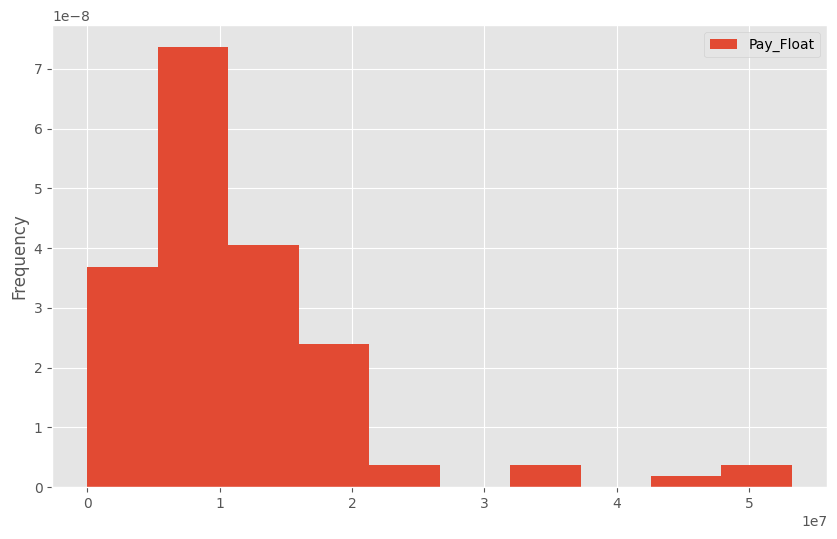

In [215]:
# Coloque seu código aqui
new_pay = with_previous_compensation.get('Total Pay').apply(convert_pay_string_to_number)
with_previous_compensation = with_previous_compensation.assign(Pay_Float=new_pay.values)
with_previous_compensation.plot(kind="hist", y='Pay_Float', density=True)

**Pergunta 5.2.** Olhando para o histograma, quantos CEOs ganharam mais de \$30 milhões? Faça um bom palpite. (Responda à pergunta preenchendo sua resposta manualmente. Você terá que fazer um pouco de aritmética; sinta-se à vontade para usar Python como calculadora.)

In [216]:
num_ceos_more_than_30_million = 90

**Pergunta 5.3.** Responda a mesma pergunta com código. Ou seja, encontre o número de CEOs com um salário total superior a \$30 milhões usando código e atribua o resultado ao nome `num_ceos_more_than_30_million_code`.

In [217]:
num_ceos_more_than_30_million_code = with_previous_compensation[with_previous_compensation.get('Pay_Float') > 30].shape[0]
num_ceos_more_than_30_million_code

101

Execute a próxima célula se quiser ver a que distância você estava.

In [218]:
percent_diff = abs(num_ceos_more_than_30_million - num_ceos_more_than_30_million_code) / num_ceos_more_than_30_million_code
print(f"Seu chute estava {percent_diff * 100}% errado!")

Seu chute estava 10.891089108910892% errado!


# Linha de chegada 🏁

Parabéns! Você concluiu o Laboratório 2.

Para enviar sua tarefa:

1. Selecione `Kernel -> Reiniciar e executar tudo` para garantir que você executou todas as células, incluindo as células de teste.
2. Leia o caderno para ter certeza de que está tudo bem e que suas respostas foram computadas.
3. Baixe seu notebook usando `Arquivo -> Baixar como -> Notebook (.ipynb)` e, em seguida, carregue seu notebook para o Moodle.